In [1]:
# Notebook to explore more serious convolutional networks 
# i.e. includes analysis of training and test accuracies

Train, test and validation arrays normalized to:
[1.], [0.9991], [1.0021]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (106425, 1, 32) 
Labels shape:  (106425,) 
Shape of test set: (10642, 1, 32) 
Shape of train set: (85140, 1, 32) 
Shape of validation set: (10643, 1, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.23, 0.19, 0.22, 0.21, 0.17] 
Fraction of validation labels:  [0.23, 0.18, 0.21, 0.21, 0.17] 
Fraction of train labels:  [0.23, 0.19, 0.21, 0.21, 0.17] 
dtype of inputs:  torch.float32


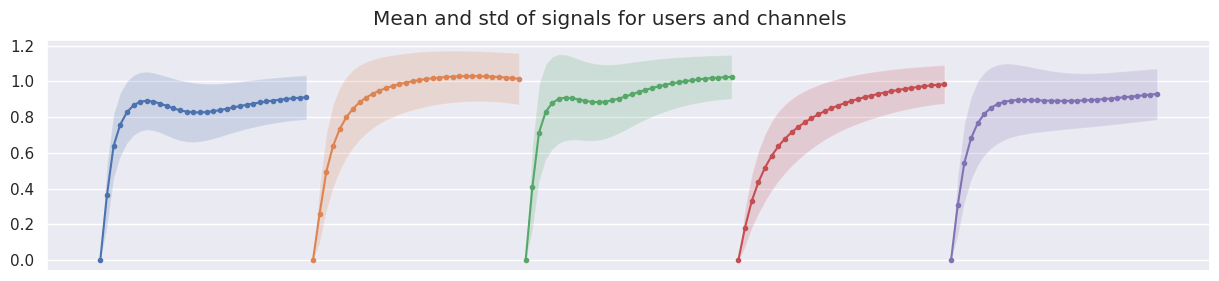

In [1]:
# Standard example 
from peratouch.data import Data 
from peratouch.trainer import Trainer 
from peratouch.results import Results 
from peratouch.networks import CNN
# from peratouch.config import datapath_five_users
from peratouch.config import path_five_users_main, path_five_users_first

D = Data(path_five_users_main, triggers=True, releases=False)
D.split()
# D.balance_train()
D.normalize()
D.tensors_to_device()
D.print_shapes()
D.plot_data()

End of epoch 1: loss_tr=1.082, loss_val=1.069, train=58.5%, val=58.9%
End of epoch 6: loss_tr=0.858, loss_val=0.849, train=66.6%, val=66.6%
End of epoch 11: loss_tr=0.814, loss_val=0.806, train=68.5%, val=68.7%
End of epoch 16: loss_tr=0.800, loss_val=0.796, train=68.9%, val=68.6%
End of epoch 21: loss_tr=0.787, loss_val=0.779, train=69.4%, val=69.7%
End of epoch 26: loss_tr=0.793, loss_val=0.779, train=68.8%, val=69.1%
End of epoch 31: loss_tr=0.753, loss_val=0.744, train=70.7%, val=70.9%
End of epoch 36: loss_tr=0.763, loss_val=0.756, train=70.5%, val=70.2%
End of epoch 41: loss_tr=0.751, loss_val=0.747, train=71.0%, val=70.6%
End of epoch 46: loss_tr=0.746, loss_val=0.742, train=71.0%, val=70.9%

Training Complete!
Loading best weights for lowest validation loss=0.736 ...

Average running time per epoch: 0.92 seconds
Total running time: 44.96 seconds

Test dataset metrics:
Overall Accuracy = 70.3%, Matthews Corr Coef = 0.63


              precision    recall  f1-score   support

  

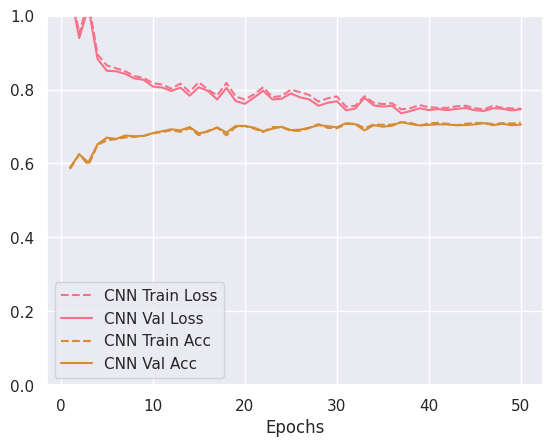

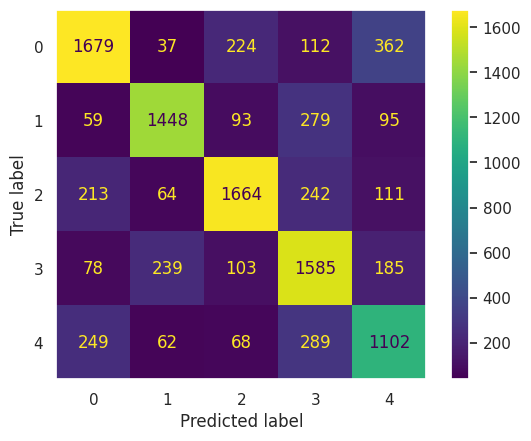

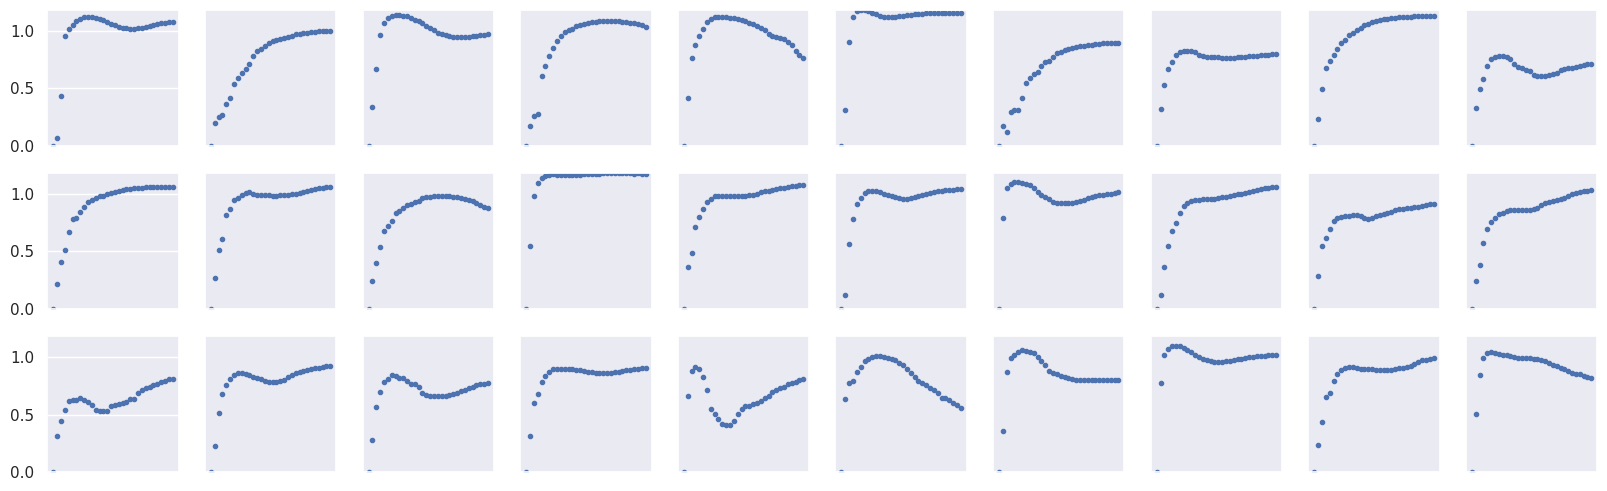

In [2]:
model = CNN(input_ch=1, n_filters=4, n_hidden=128, out_size=5)
T = Trainer(D)
T.setup(model, max_epochs=20, batch_size=5000)
T.train_model(model)
T.plot_train()

R = Results(D, model)
R.test_metrics(report=True, conf_matrix=True)
R.find_most_uncertain_preds()

In [1]:
# Look at 3 channels
from peratouch.data import Data 
from peratouch.trainer import Trainer  
from peratouch.networks import CNN 
from peratouch.config import path_five_users_main, path_five_users_first
from peratouch.results import Results
D = Data(path_five_users_main, triggers=True, releases=False)
D.group_presses()
D.split()
# D.resample_triggers()
D.normalize()
D.tensors_to_device()
D.print_shapes()

Train, test and validation arrays normalized to:
[1. 1. 1.], [0.9997 0.9999 1.0014], [0.9995 1.0002 1.0009]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (106410, 3, 32) 
Labels shape:  (106410,) 
Shape of test set: (10641, 3, 32) 
Shape of train set: (85128, 3, 32) 
Shape of validation set: (10641, 3, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.23, 0.19, 0.21, 0.21, 0.16] 
Fraction of validation labels:  [0.22, 0.19, 0.21, 0.21, 0.17] 
Fraction of train labels:  [0.23, 0.18, 0.21, 0.21, 0.17] 
dtype of inputs:  torch.float32


End of epoch 1: loss_tr=0.995, loss_val=0.990, train=60.6%, val=60.8%
End of epoch 6: loss_tr=0.702, loss_val=0.698, train=73.1%, val=73.1%
End of epoch 11: loss_tr=0.658, loss_val=0.652, train=74.4%, val=74.5%
End of epoch 16: loss_tr=0.626, loss_val=0.622, train=75.8%, val=76.1%
End of epoch 21: loss_tr=0.606, loss_val=0.600, train=76.4%, val=76.7%
End of epoch 26: loss_tr=0.557, loss_val=0.554, train=78.8%, val=79.1%
End of epoch 31: loss_tr=0.547, loss_val=0.545, train=78.8%, val=79.1%
End of epoch 36: loss_tr=0.541, loss_val=0.544, train=79.2%, val=79.2%
End of epoch 41: loss_tr=0.588, loss_val=0.588, train=77.2%, val=77.0%
End of epoch 46: loss_tr=0.528, loss_val=0.529, train=79.9%, val=79.9%

Training Complete!
Loading best weights for lowest validation loss=0.527 ...

Average running time per epoch: 1.80 seconds
Total running time: 88.06 seconds

Test dataset metrics:
Overall Accuracy = 79.1%, Matthews Corr Coef = 0.74


              precision    recall  f1-score   support

  

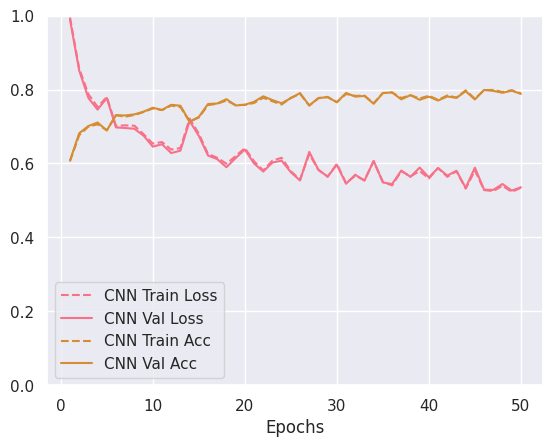

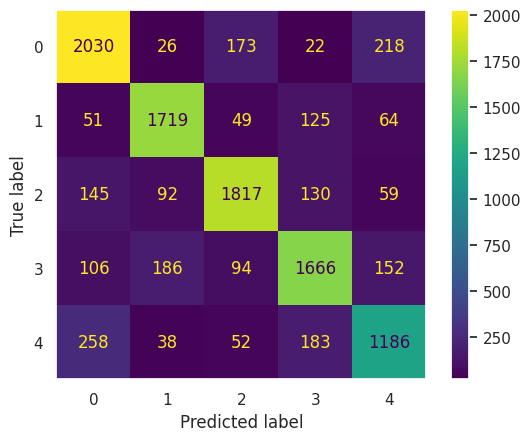

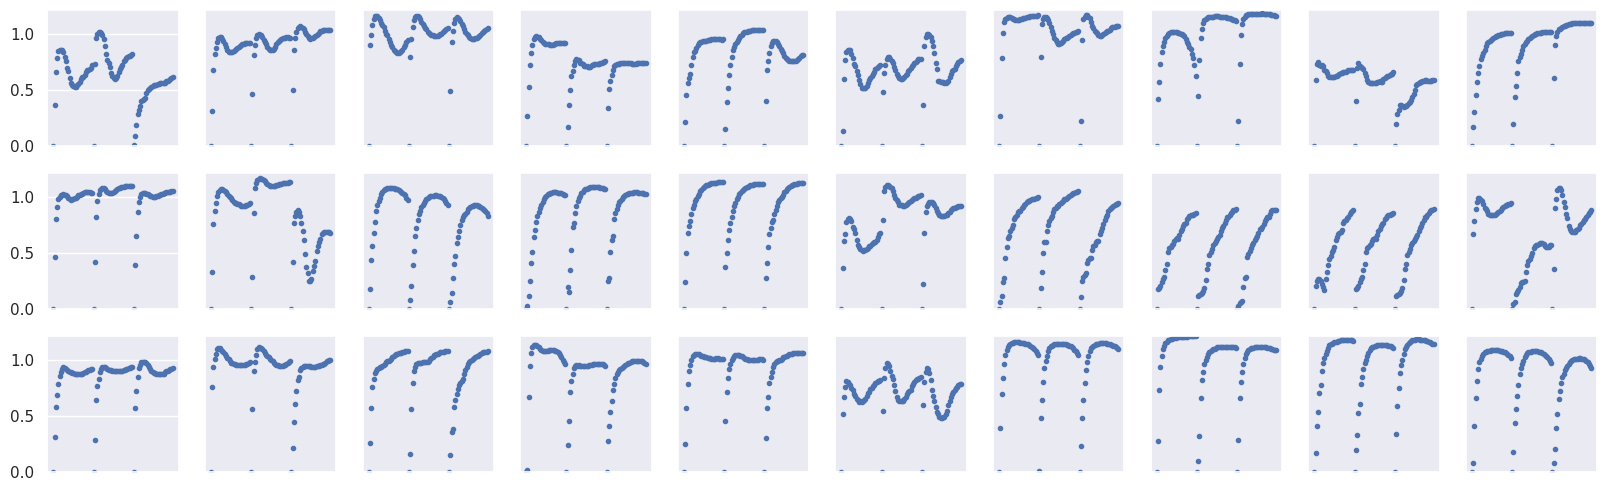

In [2]:
# Did not see any improvement by trying out CNN_Dense
model = CNN(input_ch=3, n_filters=8, n_hidden=256, out_size=5) 
T = Trainer(D) 
T.setup(model,learning_rate=1e-2, weight_decay=1e-3, max_epochs=50, batch_size=5000)
T.train_model(model)
T.plot_train()

R = Results(D, model)
R.test_metrics(report=True, conf_matrix=True)
R.find_most_uncertain_preds()

In [6]:
# TODO: To look at some simple transforms, set transforms=True
# TODO: Look at longer windows of data, maybe width=64